In [1]:
import numpy as np
import pandas as pd
from utils import *

/Users/shamanthk/.pyenv/versions/3.10.14/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = load_from_csv('/Users/shamanthk/Documents/iomics/DoWhy-attribution/datasets/lung_cancer.csv')
df = df.dropna()
df.drop_duplicates(inplace=True)
labels = list(df.columns)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cols = df.columns[(df == 1).any() | (df == 2).any()]
df[cols] = df[cols].replace({1: 0, 2: 1})

df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df = df.astype(float)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,69.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,74.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,59.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,63.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,63.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [29]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.005, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df)
df_iso_outliers = df[df['anomaly'] == -1]

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

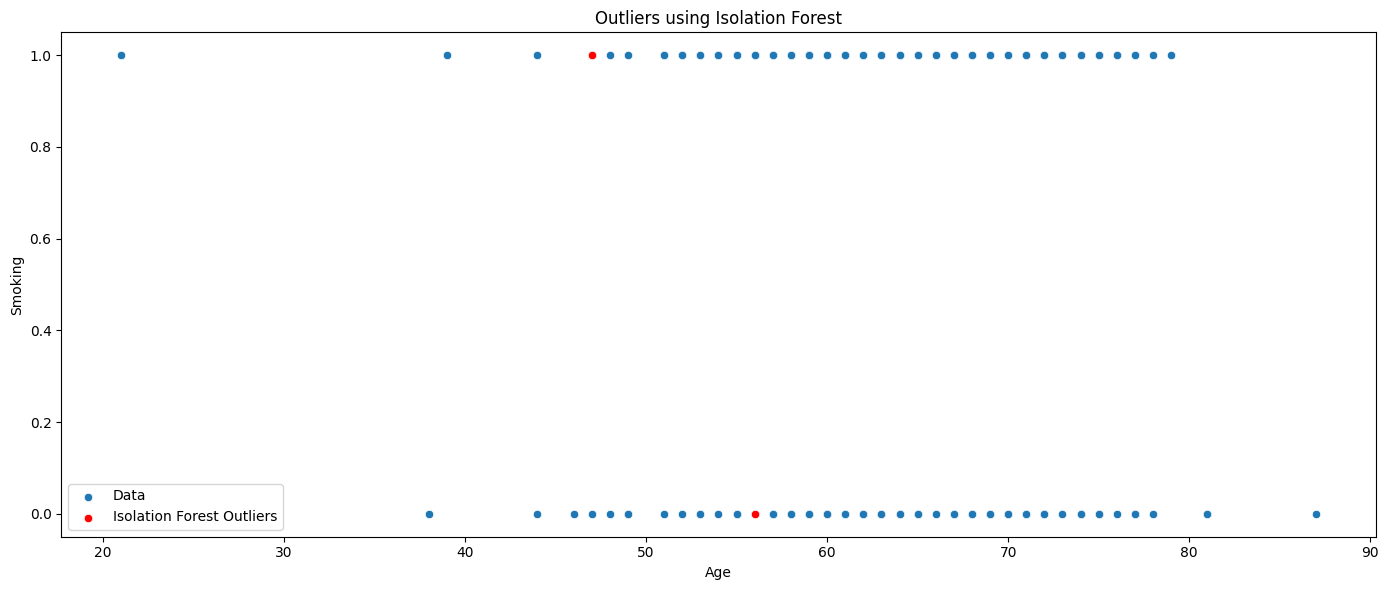

In [31]:
plt.figure(figsize=(14, 6))

# Plotting Isolation Forest outliers
sns.scatterplot(data=df, x='AGE', y='SMOKING', label='Data')
sns.scatterplot(data=df_iso_outliers, x='AGE', y='SMOKING', color='red', label='Isolation Forest Outliers')
plt.title('Outliers using Isolation Forest')
plt.xlabel('Age')
plt.ylabel('Smoking')

plt.tight_layout()
plt.show()

In [33]:
df_iso_outliers

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,anomaly
37,0.0,56.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
156,1.0,47.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1


In [15]:
from scipy.stats import zscore

z_scores = df.apply(zscore)
threshold = 5
outliers_zscore = (z_scores.abs() > threshold).any(axis=1)
df_zscore_outliers = df[outliers_zscore]

In [34]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_iqr_outliers = df[outliers_iqr]

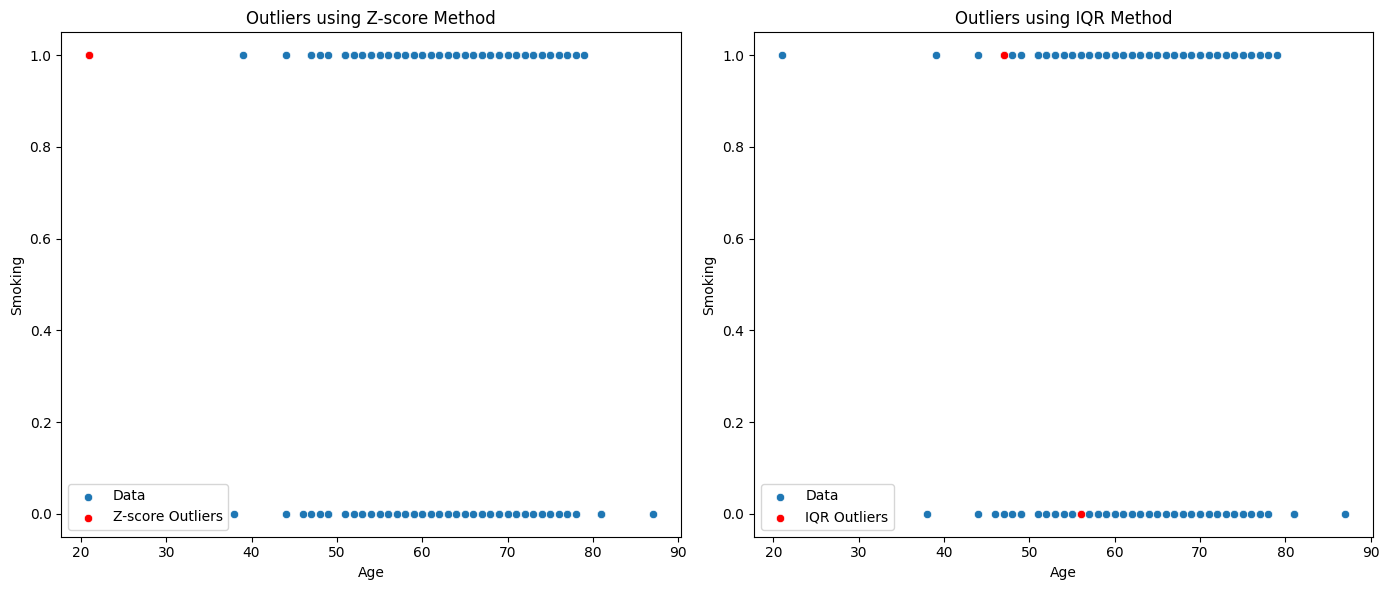

In [35]:
plt.figure(figsize=(14, 6))

# Plotting Z-score outliers
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='AGE', y='SMOKING', label='Data')
sns.scatterplot(data=df_zscore_outliers, x='AGE', y='SMOKING', color='red', label='Z-score Outliers')
plt.title('Outliers using Z-score Method')
plt.xlabel('Age')
plt.ylabel('Smoking')

# Plotting IQR outliers
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='AGE', y='SMOKING', label='Data')
sns.scatterplot(data=df_iqr_outliers, x='AGE', y='SMOKING', color='red', label='IQR Outliers')
plt.title('Outliers using IQR Method')
plt.xlabel('Age')
plt.ylabel('Smoking')

plt.tight_layout()
plt.show()

In [19]:
df_zscore_outliers

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,anomaly
22,0.0,21.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1


In [36]:
df_iqr_outliers

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,anomaly
37,0.0,56.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
156,1.0,47.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
